# string model 3 literature

In [1]:
import boolean_model_helper as bm
import string_model_drawer as draw
from string_model_builder_3 import string2definition, add_mtb2definition

In [2]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']
complexes = ['ESCRT_complexes', 'MHC_I_complexes', 'vATPase_complexes', 'ImportinBetaAlpha_complexes']
processes = ['Phagosome_maturation', 'Phagosome_acidification', 'Phagolysosome_assembly']



model 3

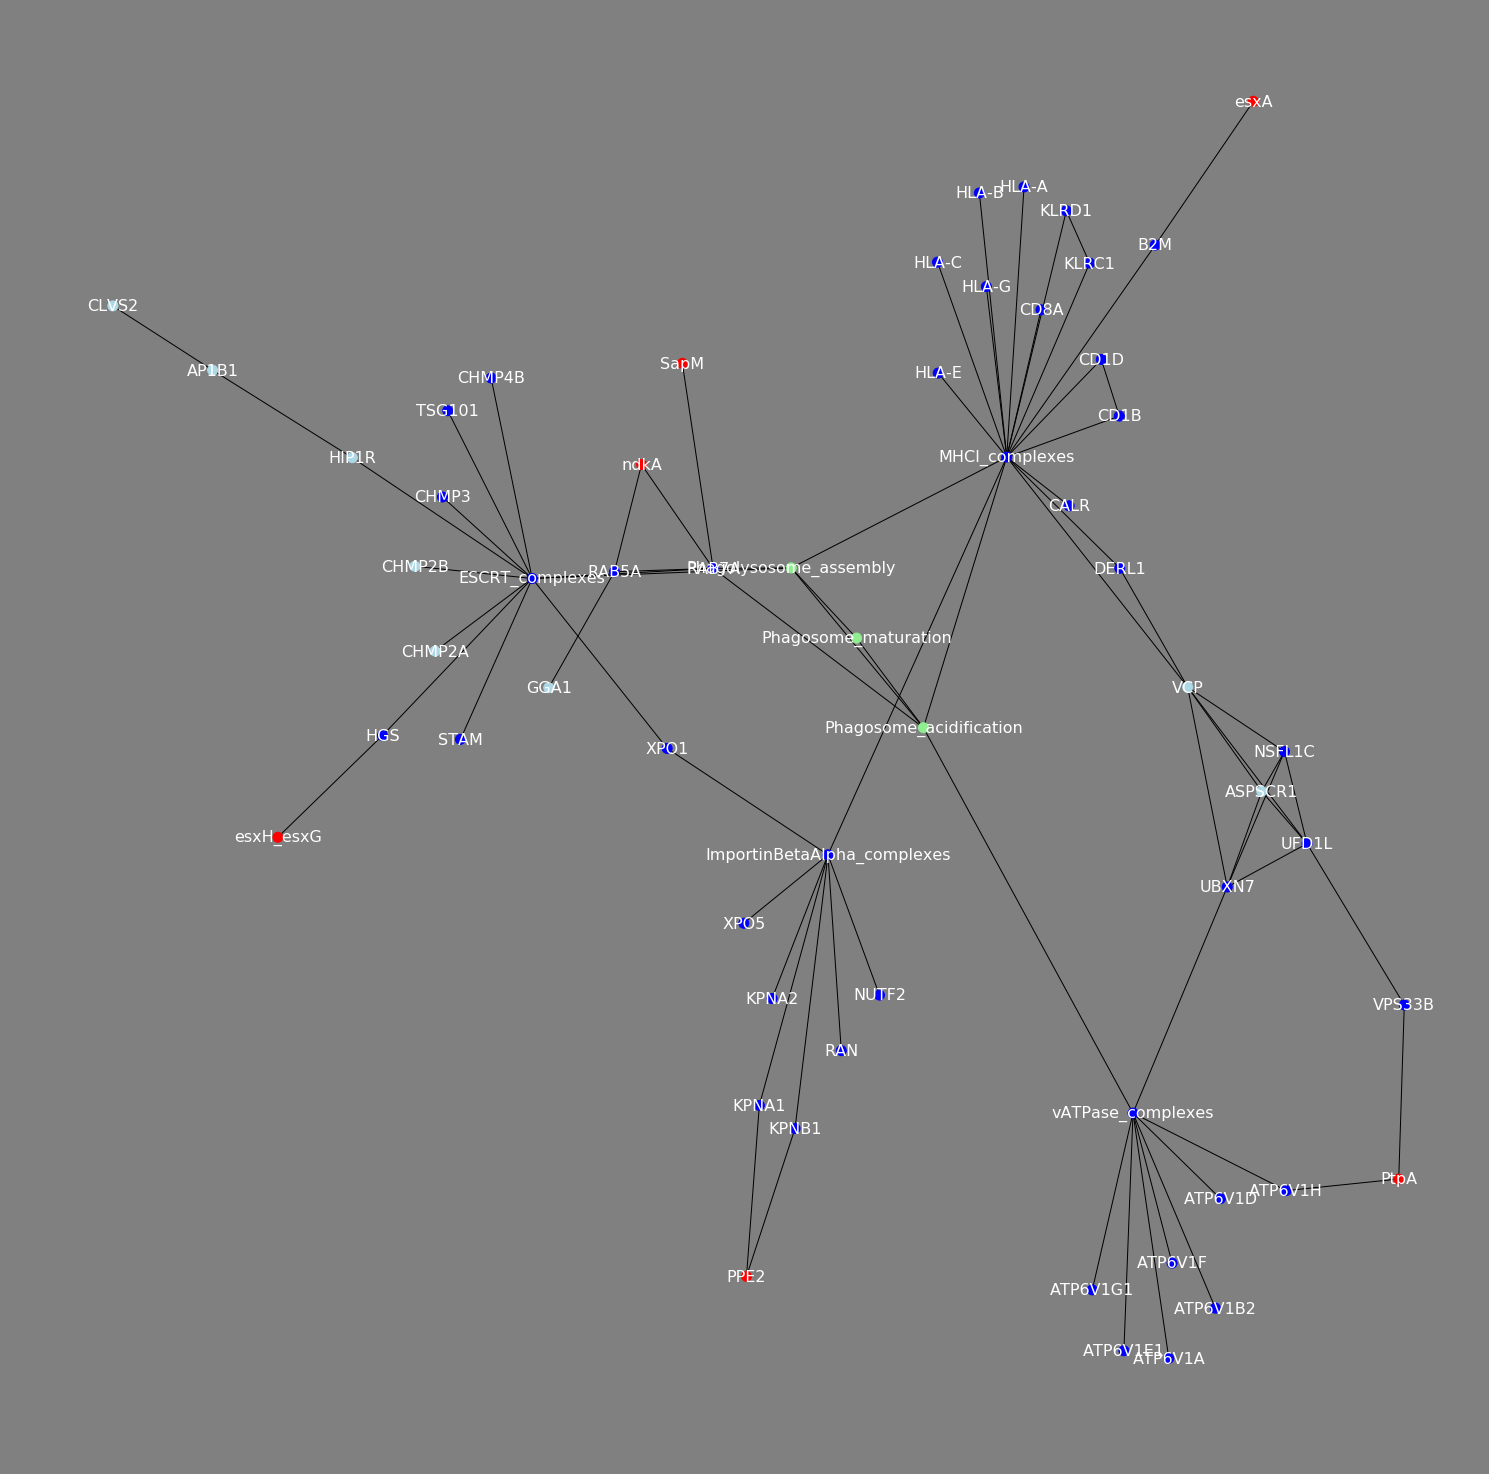

In [3]:
draw.draw_edgelists('string-network-2.csv', # model 3 changes just at the process level
               add_mtb='mtb-edgelist.csv', 
               add_process='string-3-process-edgelist.csv',
               highlight=hit
              )

In [4]:
definition = string2definition('string_model_3_definition.txt')
hit = [factor for factor in hit if factor in definition]
print definition

#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True
ESCRT_complexes = True
MHC_I_complexes = True
vATPase_complexes = True
ImportinBetaAlpha_complexes = True

#rules
vATPase_complexes *= ATP6V1F and ATP6V1B2 and ATP6V1A and ATP6V1G1 and ATP6V1D and ATP6V1E1 and ATP6V1H
ESCRT_complexes *= HGS and CHMP2A and CHMP4B and CHMP2B and CHMP3 and STAM and TSG101
MHC_I_complexes *= B2M and HLA-C and HLA-B and HLA-G and HLA-E and CD

1 mtb on/off

In [5]:
# define models
definition_mtb = add_mtb2definition(definition, 'mtb-edgelist.csv', True)
mtb = [factor for factor in mtb if factor in definition_mtb] # just factors modelled for drawing


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [6]:
# run model
models = bm.run_model(definition_mtb, steps=50, runs=100)

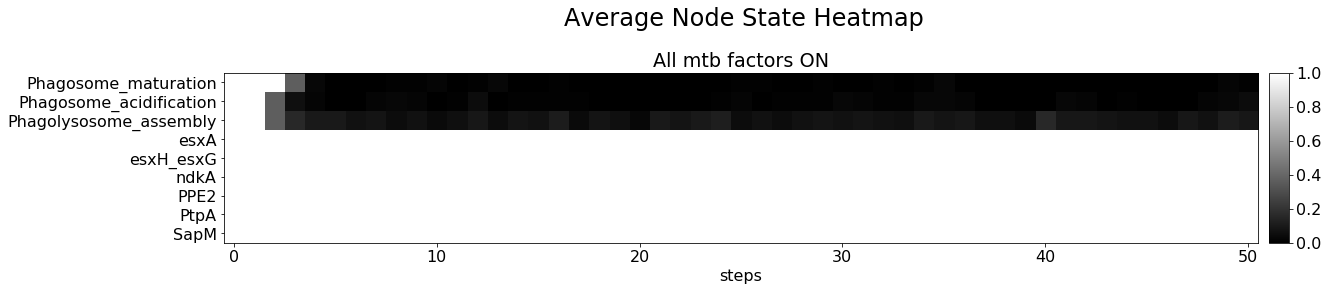

In [13]:
# plot average
avg = bm.average_models(models)
bm.plot_maps([avg],
             titles=['All mtb factors ON'], 
             nodes = processes + mtb,
             h = 4,
             top = 0.75,
             bottom=0.16,
             left=.16,
             suptitle='        Average Node State Heatmap' # white space to centre
            )




In [ ]:
# analyse behaviour
cycles = bm.get_cycles(models)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
bm.print_cycles(cycles)

In [ ]:
# look at factors one at a time
definition_mtb = add_mtb2definition(definition, 'mtb-edgelist.csv', False)
avgs = []
for factor in mtb:
    definition_loop = bm.switch(definition_mtb,on=[factor])
    models = bm.run_model(definition_loop, steps=100, runs=100)
    avgs.append(bm.average_models(models))

In [ ]:
for avg in avgs:
    bm.plot_data(avg, nodes = processes + mtb, h=5, w=20, fontsize=18, title='Node Heatmaps: 100 run average')

2 knockouts null 

In [ ]:
print definition 

In [ ]:
#knockout hits
definition_knockouts = bm.knockout(definition, hit)
print definition_knockouts

In [ ]:
# runs
models = bm.run_model(definition_knockouts, steps=100, runs=100)

In [ ]:
# average heatmaps
avg = bm.average_models(models)
bm.plot_data(avg, nodes = processes + hit, h=5, w=20, fontsize=18, title='Node Heatmap: 100 run average')

In [ ]:
# analyse behaviour
cycles = bm.get_cycles(models)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
bm.print_cycles(cycles)
models[2].report_cycles()

In [ ]:
# turn mtb on
definition_knockouts_mtb = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', True) 
print definition_knockouts_mtb

In [ ]:
# runs
models = bm.run_model(definition_knockouts_mtb, steps=100, runs=100)

In [ ]:
# average heatmaps
avg = bm.average_models(models)
bm.plot_data(avg, nodes = processes + hit, h=5, w=20, fontsize=18, title='Node Heatmap: 100 run average')

In [ ]:
# analyse behaviour
cycles = bm.get_cycles(models)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
bm.print_cycles(cycles)

In [ ]:
# knockouts less mtb
definition_knockouts_mtb = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', False)

In [ ]:
avgs = []
for factor in mtb:
    definition_loop = bm.switch(definition_knockouts_mtb, on=[factor])
    models = bm.run_model(definition_loop, steps=100, runs=100)
    avg = bm.average_models(models)
    avgs.append(avg)

In [ ]:
for avg in avgs:
    bm.plot_data(avg, nodes = processes + hit + mtb, h=8, w=20, fontsize=18, title='Node Heatmap: 100 run average')

In [ ]:
definition_mtb = add_mtb2definition(definition, 'mtb-edgelist.csv', True)
print definition_mtb

In [ ]:
avgs = []
for factor in hit:
    definition_loop = bm.knockout(definition_mtb, [factor])
    models = bm.run_model(definition_loop, steps=100, runs =100)
    avg = bm.average_models(models)
    avgs.append(avg)

In [ ]:
for avg in avgs:
    bm.plot_data(avg, nodes = processes + hit + mtb, h=8, w=20, fontsize=18, title='Node Heatmap: 100 run average')

### 